In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

### Data

In [200]:
from dotenv import load_dotenv
import os

# reemplaza esto con la ruta completa del archivo .env

load_dotenv(dotenv_path=".env")

my_var = os.environ.get("AUTH_API")

In [201]:
import requests

url_internet_provincia = f"http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/ACCES-A-INTER-FIJO-POR/data.ajson/?auth_key={my_var}&limit=265"
acc_inter_rangos_veloc = f"http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/ACCES-A-INTER-FIJO-23248/data.ajson/?auth_key={my_var}&limit=265"

response_internet_provincia = requests.get(url_internet_provincia)
response_acc_inter_rangos_veloc = requests.get(acc_inter_rangos_veloc)
data = []
for response in [response_internet_provincia, response_acc_inter_rangos_veloc]:
    if response.status_code == 200:
        data.append(response.json())
    else:
        print("Error en la petición:", response.status_code)



In [ ]:
display(data[1])

In [202]:
df_internet_provincia = pd.DataFrame(data[0]['result'][1:], columns=data[0]['result'][0])
df_veloc_provincia = pd.DataFrame(data[1]['result'][1:], columns=data[1]['result'][0])

In [203]:
df_veloc_provincia.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,3,Buenos Aires,"29,985","27,709","290,315","297,915","267,044","124,190","3,618,689","65,821","4,721,668"
1,2022,3,Capital Federal,517,"5,742","34,371","67,829","51,946","28,692","1,253,105","105,477","1,547,679"
2,2022,3,Catamarca,71,384,"3,107","5,389","5,099","3,737","50,298","2,208","70,293"
3,2022,3,Chaco,461,987,"16,782","18,938","8,049","15,828","79,390","3,711","144,146"
4,2022,3,Chubut,109,"1,444","45,707","30,940","34,682","15,309","17,563","20,024","165,778"


Convertir los dtypes de las columnas a como corresponde

In [204]:
df_internet_provincia = df_internet_provincia.applymap(lambda x: x.replace(',', '') if isinstance(x, str) else x)
df_veloc_provincia = df_veloc_provincia.applymap(lambda x: x.replace(',', '') if isinstance(x, str) else x)

In [205]:
display(df_internet_provincia.columns)
display(df_veloc_provincia.columns)

Index(['Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica',
       'Wireless', 'Otros', 'Total'],
      dtype='object')

Index(['Año', 'Trimestre', 'Provincia', 'HASTA 512 kbps',
       '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
       '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS',
       'Total'],
      dtype='object')

In [206]:
col_vel = ['Año', 'Trimestre', 'HASTA 512 kbps',
       '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
       '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS',
       'Total']

col_int_prov = ['Año', 'Trimestre', 'ADSL', 'Cablemodem', 'Fibra óptica',
       'Wireless', 'Otros', 'Total']


df_internet_provincia[col_int_prov] = df_internet_provincia[col_int_prov].astype(int)
df_veloc_provincia[col_vel] = df_veloc_provincia[col_vel].astype(int)

In [208]:
df_internet_provincia = df_internet_provincia.rename(columns={'Otros': 'Otros_Prov'}) 
df_internet_provincia.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros_Prov,Total
0,2022,3,Buenos Aires,339648,2748325,1436433,126846,70416,4721668
1,2022,3,Capital Federal,140791,1240125,129218,5758,31787,1547679
2,2022,3,Catamarca,10010,10495,46224,1329,2235,70293
3,2022,3,Chaco,27164,61800,44645,8178,2359,144146
4,2022,3,Chubut,45377,72212,9574,29784,8831,165778


In [209]:
df_veloc_provincia = df_veloc_provincia.rename(columns={'OTROS': 'Otros_Veloc'})
df_veloc_provincia.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,Otros_Veloc,Total
0,2022,3,Buenos Aires,29985,27709,290315,297915,267044,124190,3618689,65821,4721668
1,2022,3,Capital Federal,517,5742,34371,67829,51946,28692,1253105,105477,1547679
2,2022,3,Catamarca,71,384,3107,5389,5099,3737,50298,2208,70293
3,2022,3,Chaco,461,987,16782,18938,8049,15828,79390,3711,144146
4,2022,3,Chubut,109,1444,45707,30940,34682,15309,17563,20024,165778


In [210]:
df_total = pd.merge(df_internet_provincia, df_veloc_provincia, on=['Año', 'Trimestre','Provincia','Total'])

In [211]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Año                  240 non-null    int32 
 1   Trimestre            240 non-null    int32 
 2   Provincia            240 non-null    object
 3   ADSL                 240 non-null    int32 
 4   Cablemodem           240 non-null    int32 
 5   Fibra óptica         240 non-null    int32 
 6   Wireless             240 non-null    int32 
 7   Otros_Prov           240 non-null    int32 
 8   Total                240 non-null    int32 
 9   HASTA 512 kbps       240 non-null    int32 
 10  + 512 Kbps - 1 Mbps  240 non-null    int32 
 11  + 1 Mbps - 6 Mbps    240 non-null    int32 
 12  + 6 Mbps - 10 Mbps   240 non-null    int32 
 13  + 10 Mbps - 20 Mbps  240 non-null    int32 
 14  + 20 Mbps - 30 Mbps  240 non-null    int32 
 15  + 30 Mbps            240 non-null    int32 
 16  Otros_Ve

In [212]:
df_total.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros_Prov,Total,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,Otros_Veloc
0,2022,3,Buenos Aires,339648,2748325,1436433,126846,70416,4721668,29985,27709,290315,297915,267044,124190,3618689,65821
1,2022,3,Capital Federal,140791,1240125,129218,5758,31787,1547679,517,5742,34371,67829,51946,28692,1253105,105477
2,2022,3,Catamarca,10010,10495,46224,1329,2235,70293,71,384,3107,5389,5099,3737,50298,2208
3,2022,3,Chaco,27164,61800,44645,8178,2359,144146,461,987,16782,18938,8049,15828,79390,3711
4,2022,3,Chubut,45377,72212,9574,29784,8831,165778,109,1444,45707,30940,34682,15309,17563,20024


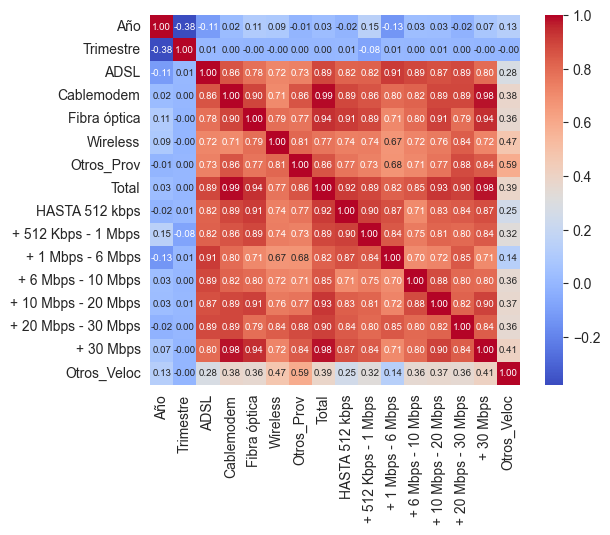

In [213]:
corr = df_total.corr(numeric_only=True)
plt.Figure(figsize=(30,30))
sns.heatmap(corr, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 7},
            cmap='coolwarm')
plt.show()

Entrar en el campo de las telecomunicaciones en Argentina con un servicio de CableModem o Fibra Optica.

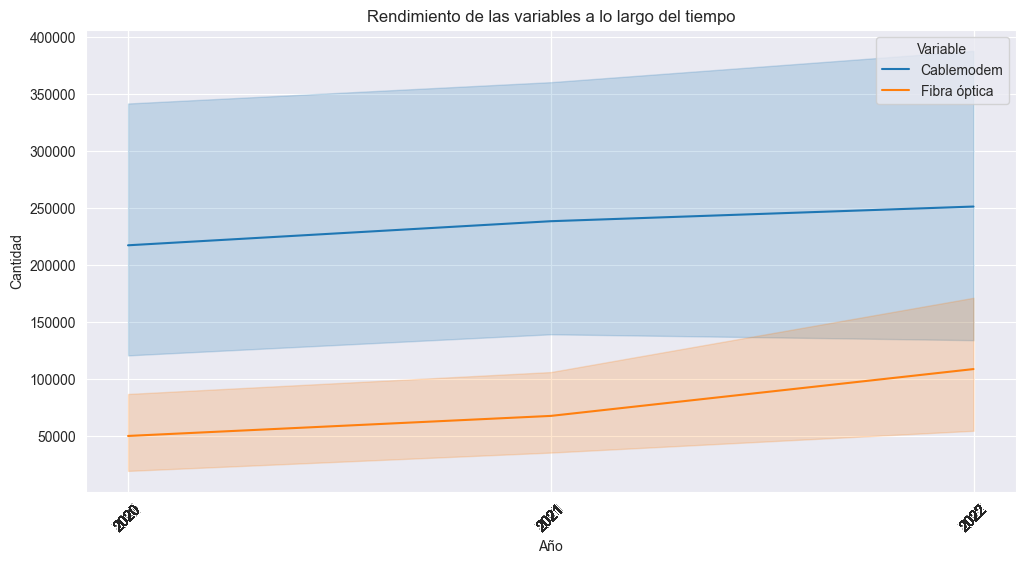

In [290]:
df_long = pd.melt(df_total, id_vars=['Año'], value_vars=['Cablemodem', 'Fibra óptica'], var_name='Variable', value_name='Cantidad')

# Create line plot
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long, x='Año', y='Cantidad', hue='Variable')
plt.title("Rendimiento de las variables a lo largo del tiempo")
plt.xlabel("Año")
plt.ylabel("Cantidad")
plt.xticks(df_total['Año']) # Establecer intervalo entre ticks del eje X
plt.xticks(rotation=45) # Rotar los ticks del eje X para mayor legibilidad
plt.show()

# Predicciones

In [267]:
from sklearn.model_selection import train_test_split

X = df_total[['Año']]
y = df_total[['Fibra óptica', 'Cablemodem']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [268]:
from sklearn.linear_model import LinearRegression


# Entrenar el modelo de regresión lineal múltiple
reg = LinearRegression().fit(X_train, y_train)


In [282]:
X_futuro = np.array(range(2022, 2031)).reshape(-1, 1)
y_futuro = reg.predict(X_futuro)

c:\Users\mario\projects\henry_labs\henry_lab02\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


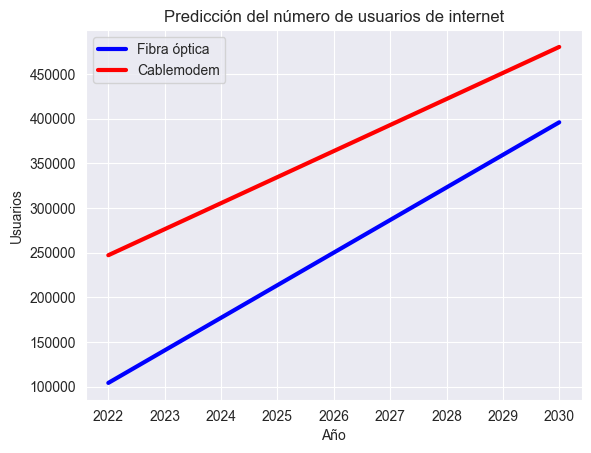

In [286]:
# Graficar las predicciones para los próximos 5 años
plt.plot(X_futuro, y_futuro[:, 0], color='blue', linewidth=3, label='Fibra óptica')
plt.plot(X_futuro, y_futuro[:, 1], color='red', linewidth=3, label='Cablemodem')

# Agregar etiquetas y título a la gráfica
plt.xlabel('Año')
plt.ylabel('Usuarios')
plt.title('Predicción del número de usuarios de internet')
plt.legend()
plt.show()

### TELEFONIA MOVIL VS INTERNET

Data de tv 

In [165]:
url_tv = f"http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/INGRE-TRIME-POR-LA-86109/data.ajson/?auth_key={my_var}&limit=50&"
response_tv = requests.get(url_tv)
if response_tv.status_code == 200:
    data_tv = response_tv.json()
else:
    print("Error en la petición:", response.status_code)

In [166]:
df_internet = pd.read_csv('../data/Internet_Ingresos.csv')
df_movil = pd.read_csv('../data/Telefonia_movil.csv')
df_fija = pd.read_csv('../data/telefonia_fija.csv')
df_tv = pd.DataFrame(data_tv['result'][1:], columns=data_tv['result'][0])

In [167]:
df_internet = df_internet.applymap(lambda x: x.replace('.', '').replace('$', '') if isinstance(x, str) else x)
df_movil = df_movil.applymap(lambda x: x.replace('.', '').replace('$', '') if isinstance(x, str) else x)
df_tv = df_tv.applymap(lambda x: x.replace(',', '').replace('$', '').replace('.', '') if isinstance(x, str) else x)
df_fija = df_fija.applymap(lambda x: x.replace('.', '') if isinstance(x, str) else x)


In [168]:
df_fija = df_fija[['Año', 'Trimestre', 'Accesos telefonía fija (total)', 'Accesos telefonía fija (hogares)']].copy()

In [169]:
df_internet.drop(columns='Periodo', inplace=True)
df_movil.drop(columns='Periodo', inplace=True)

In [170]:
df_internet = df_internet.astype(np.int64)
df_movil = df_movil.astype(np.int64)
df_tv = df_tv.astype(np.int64)
df_fija = df_fija.astype(np.int64)

In [171]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Año                        35 non-null     int64
 1   Trimestre                  35 non-null     int64
 2   Ingresos (miles de pesos)  35 non-null     int64
dtypes: int64(3)
memory usage: 968.0 bytes


In [172]:
df_movil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Año                    39 non-null     int64
 1   Trimestre              39 non-null     int64
 2   Ingresos (miles de $)  39 non-null     int64
dtypes: int64(3)
memory usage: 1.0 KB


In [173]:
df_tv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Año                                        35 non-null     int64
 1   Trimestre                                  35 non-null     int64
 2   Ingresos TV por suscripción  (miles de $)  35 non-null     int64
 3   Ingresos TV satelital (miles de $)         35 non-null     int64
dtypes: int64(4)
memory usage: 1.2 KB


In [174]:
df_fija.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Año                               35 non-null     int64
 1   Trimestre                         35 non-null     int64
 2   Accesos telefonía fija (total)    35 non-null     int64
 3   Accesos telefonía fija (hogares)  35 non-null     int64
dtypes: int64(4)
memory usage: 1.2 KB


In [176]:
df_service = pd.merge(df_internet, df_movil, on=['Año', 'Trimestre']).merge(df_tv, on=['Año', 'Trimestre']).merge(df_fija, on=['Año', 'Trimestre'])

In [177]:
df_service.head()

,Año,Trimestre,Ingresos (miles de pesos),Ingresos (miles de $),Ingresos TV por suscripción (miles de $),Ingresos TV satelital (miles de $),Accesos telefonía fija (total),Accesos telefonía fija (hogares)
0,2022,3,67055930,174057836,5224278463,2707319089,7525944,6880892
1,2022,2,60335724,153032313,4629267344,2355948483,7633074,6960775
2,2022,1,55589997,130454676,4209387019,2126808624,7664854,6984398
3,2021,4,45467887,127389786,382733918,1803806544,7626355,6933738
4,2021,3,42999944,117751925,3639802553,180395195,7003303,6311742


In [178]:
df_service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Año                                        35 non-null     int64
 1   Trimestre                                  35 non-null     int64
 2   Ingresos (miles de pesos)                  35 non-null     int64
 3   Ingresos (miles de $)                      35 non-null     int64
 4   Ingresos TV por suscripción  (miles de $)  35 non-null     int64
 5   Ingresos TV satelital (miles de $)         35 non-null     int64
 6   Accesos telefonía fija (total)             35 non-null     int64
 7   Accesos telefonía fija (hogares)           35 non-null     int64
dtypes: int64(8)
memory usage: 2.3 KB


In [179]:
df_service.tail()

,Año,Trimestre,Ingresos (miles de pesos),Ingresos (miles de $),Ingresos TV por suscripción (miles de $),Ingresos TV satelital (miles de $),Accesos telefonía fija (total),Accesos telefonía fija (hogares)
30,2015,1,4876385,19337342,529208822,302183723,10086221,8358053
31,2014,4,3950441,20012332,471196739,268612401,9689752,7989623
32,2014,3,3478638,18976053,442300882,253079672,9613361,7924613
33,2014,2,3270816,17680972,405372907,234170831,9548994,7872511
34,2014,1,2984054,15938353,359948435,200122117,9562231,7897980


In [180]:
df_service_filter = df_service.query('Año >= 2020').copy()

In [181]:
df_service_filter

,Año,Trimestre,Ingresos (miles de pesos),Ingresos (miles de $),Ingresos TV por suscripción (miles de $),Ingresos TV satelital (miles de $),Accesos telefonía fija (total),Accesos telefonía fija (hogares)
0,2022,3,67055930,174057836,5224278463,2707319089,7525944,6880892
1,2022,2,60335724,153032313,4629267344,2355948483,7633074,6960775
2,2022,1,55589997,130454676,4209387019,2126808624,7664854,6984398
3,2021,4,45467887,127389786,382733918,1803806544,7626355,6933738
4,2021,3,42999944,117751925,3639802553,180395195,7003303,6311742
5,2021,2,38239667,104782020,3367499579,1803844236,7081716,6378508
6,2021,1,36676371,93112153,3192451501,1803836096,7200461,6459673
7,2020,4,33539703,83479114,2632409862,1447962262,7364032,6621370
8,2020,3,31997445,79634755,253861546,1293320033,7432548,6712162
9,2020,2,32102476,73538944,2462000949,1254472593,7463257,6694729


In [184]:
df_service_filter = df_service_filter.rename(columns={'Ingresos (miles de pesos)': 'Ingresos_Internet (miles de pesos)',
                                                      'Ingresos (miles de $)':'Ingresos_Movil (miles de $)'})

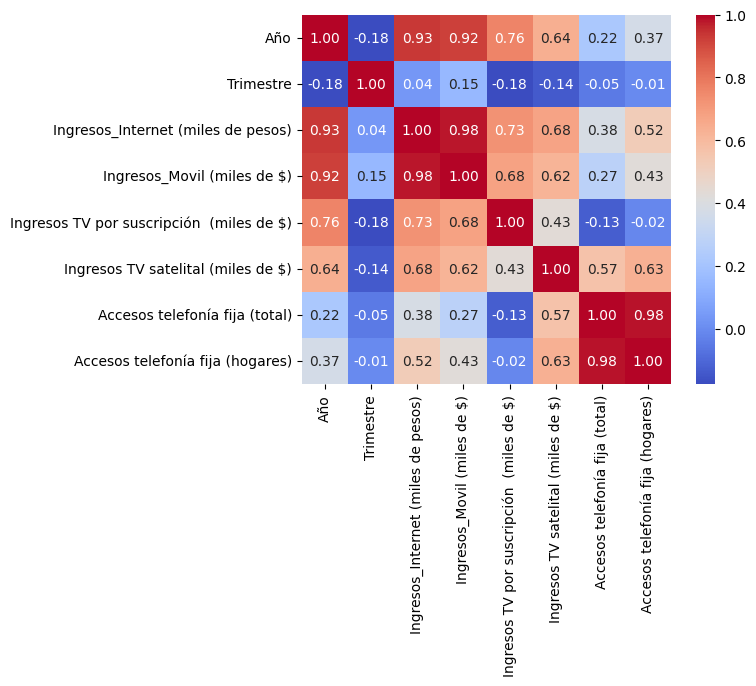

In [185]:
corr = df_service_filter.corr(numeric_only=True)
plt.Figure(figsize=(30,30))
sns.heatmap(corr, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
            cmap='coolwarm')
plt.show()

Crear un servicio de plan hogar que incluya Internet, Telefonia Movil y TV por suscripcion (Netflix, Amazon Prime, Hulu, Disney+)

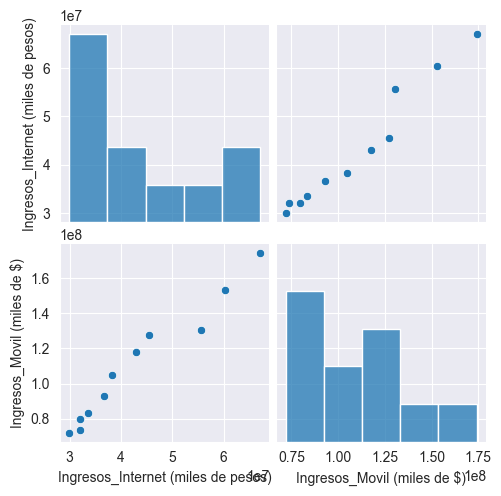

In [284]:
sns.pairplot(df_service_filter[['Ingresos_Internet (miles de pesos)', 'Ingresos_Movil (miles de $)']] )